1. Create a random noise color and grayscale image. You can set your own width and height, but keep the total number of pixels of both images identical.

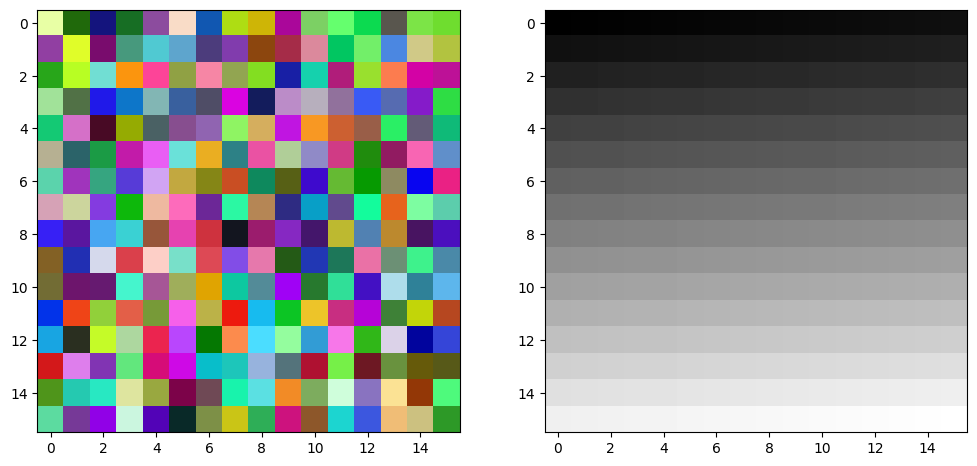

In [19]:
import numpy as np
import matplotlib.pyplot as plt

height = 16
width = 16

random_noise = np.random.randint(0,256,(height, width, 3), dtype=np.uint8)

grayscale = np.arange(0,256,dtype=np.uint8).reshape((width,height))

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(random_noise)

plt.subplot(1,2,2)
plt.imshow(grayscale, cmap="gray", vmin=0, vmax=255)

plt.show()

2. Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 * img is the source image
 * num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 * line_color is the color of the grid line.
 * The output of the function should be image with grids

In [37]:
from utils import display_images

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color): 
    image = cv.imread(img)
    img_copy = image.copy()

    #color
    if line_color == "green":
        line_color = (0,255,0)
    elif line_color == "red":
        line_color = (0,0,255)
    elif line_color == "blue":
        line_color = (255,0,0)
    
    #grab width and height of img
    height, width = image.shape[:2] #get 0 and 1
    #number of pixels per patch
    M, N = height // num_vertical_grid, width // num_horizontal_grid

    for y in range (0,height, M):
        for x in range (0,width,N):
            x1 = x+N
            y1 = y+M
        
            if x1>=width and y1>=height:
                x1 = width-1
                y1= height-1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color,1)
            
            elif x1>=width:
                x1 = width-1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color,1)
            
            elif y1>=height:
                y1= height-1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color,1)
        
            else:
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color,1)
            
    display_image("patch", img_copy)

In [69]:
img = "images/dog.jfif"
num_horizontal_grid = 3 
num_vertical_grid = 3
line_color = "blue"
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)


3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.

### Method1: convertScaleAbs function

In [70]:
img = cv.imread("images/dog.jfif")

alp = 1.5
bet = 50
res = cv.convertScaleAbs(img, alpha=alp, beta=bet)
display_images([img, res], ("original", f"alpha={alpha}, beta={beta}"))

### Method2: Changing HSV's V

In [73]:
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
#saturation 
h, s, v = cv.split(img_hsv)

#change s channel to [0,255]
new_value = 200
v_new = np.zeros_like(v) + new_value
v_new = np.uint8(v_new)

#merge channels
transform = cv.merge((h, s, v_new))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)
display_images([img, transform_display], ("original", f"value={new_value}"))

4. Provide at least one common use cases for the following color spaces:
    - RGB
    - HSV
    - CIELAB

1. RGB
   * Display devices (e.g. Monitors, TV, mobile devices)
   * Web design and development

2. HSV
    * Color picking and selection (graphics and game development)
    * Fashion and design (select and modify colors for fabrics, textiles, and materials)

3. CIELAB
    * Printing and Publishing (e.g. paper, ink cuz accurate representation)
    * Color matching (e.g. color reproduction, paint mixing)